Importing Necessary Dependencies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import contextily as ctx  

In [2]:
PREPROCESSED_DATA_PATH = "../../data/field-data/preprocessed.csv"

In [3]:
df = pd.read_csv(PREPROCESSED_DATA_PATH)
# Shape of the dataframe
print(f"rows = {df.shape[0]}\ncolumns = {df.shape[1]}")
df.head()

rows = 2009
columns = 7


,id,lon,lat,AGB_tha,cluster_id,plot_id,subplot_id
0,10-75-3,80.413257,28.870558,454.729757,10,75,3
1,10-75-6,80.416333,28.870571,499.730683,10,75,6
2,10-84-4,80.405569,29.192646,367.626079,10,84,4
3,10-92-3,80.392803,29.484019,11.786484,10,92,3
4,10-92-4,80.395913,29.481326,77.825277,10,92,4


Unique number of clusters, plots and subplots

In [4]:
unique_clusters = df["cluster_id"].nunique()
unique_plots = df[["cluster_id", "plot_id"]].drop_duplicates().shape[0]
unique_subplots = df[["cluster_id", "plot_id", "subplot_id"]].drop_duplicates().shape[0]

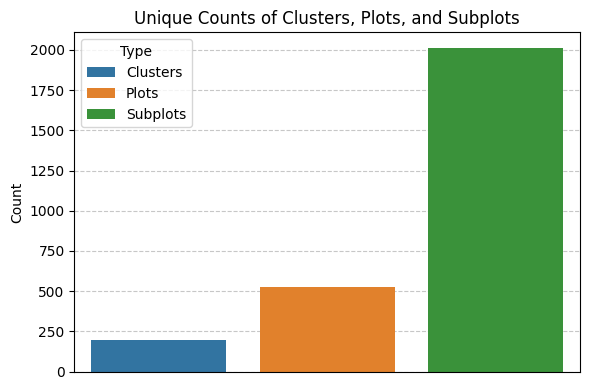

Unique clusters : 195
Unique plots    : 524
Unique subplots : 2009


In [5]:
data = pd.DataFrame(
    {
        "Category": ["Clusters", "Plots", "Subplots"],
        "Count": [unique_clusters, unique_plots, unique_subplots],
    }
)

# plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=data, x="Category", y="Count", hue="Category", legend=True)

ax.set_title("Unique Counts of Clusters, Plots, and Subplots")

# remove x-axis labels and ticks
ax.set_xlabel("")
ax.set_xticks([])

# y-axis grid
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

# legend
ax.legend(title="Type")

plt.tight_layout()
plt.show()

print("Unique clusters :", unique_clusters)
print("Unique plots    :", unique_plots)
print("Unique subplots :", unique_subplots)

Target Distribution

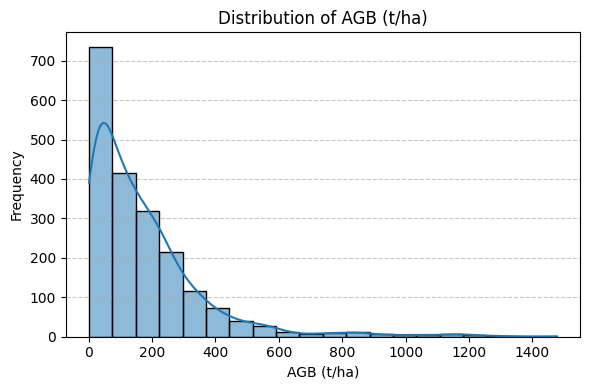

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(data=df, x="AGB_tha", bins=20, kde=True)

plt.title("Distribution of AGB (t/ha)")
plt.xlabel("AGB (t/ha)")
plt.ylabel("Frequency")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
df['AGB_tha'].describe()

count    2009.000000
mean      172.365700
std       187.597624
min         0.966881
25%        41.964491
50%       121.805401
75%       231.086400
max      1477.000000
Name: AGB_tha, dtype: float64

Key Observations:

- Distribution is strongly right-skewed (mean > median).
- Majority of plots have low–moderate AGB, with a few very high values dominating the mean.
- For reporting/modeling, consider:
    - Use median & IQR instead of mean
    - Log-transforming AGB
    - Analyzing by cluster/plot to explain variability

Geolocations of the plots on the map

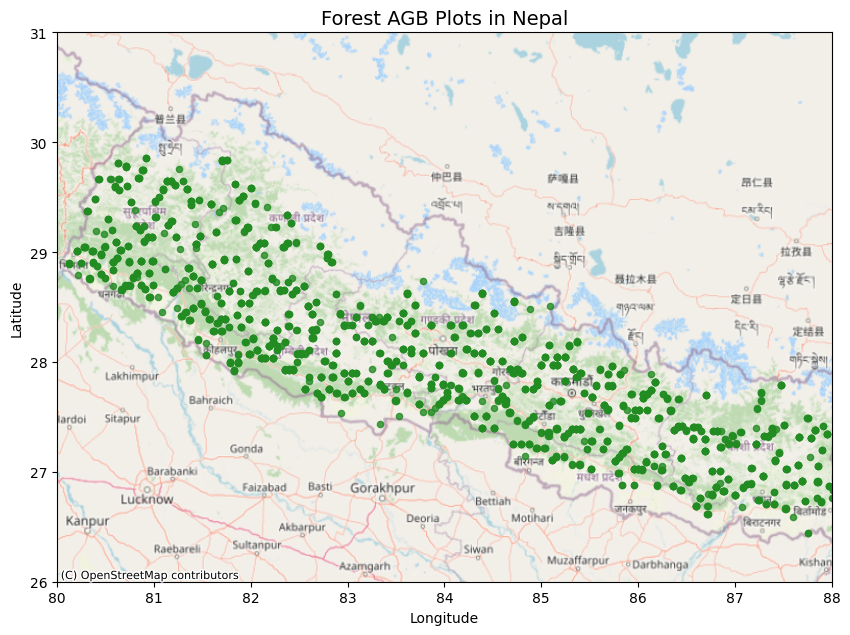

In [8]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df["lon"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="forestgreen", markersize=20, alpha=0.8)

# Add basemap using OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Set extent to Nepal
ax.set_xlim(80, 88)
ax.set_ylim(26, 31)

ax.set_title("Forest AGB Plots in Nepal", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()